In [7]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib as mpl
import nilearn
from nilearn import surface
from nilearn import plotting
from os.path import join as opj
from nilearn import datasets
import os

In [8]:
pth = '/home/lisz/Desktop/Time_project/time_fmri/data/derivatives/glm_complex_anova/glm_group_level'
pth_end = '/cope1.feat/thresh_zstat1.nii.gz'

# Download a Freesurfer fsaverage surface
fsaverage = datasets.fetch_surf_fsaverage()

In [9]:
st = nib.load(pth+'/contrast1.gfeat'+pth_end)
tz = nib.load(pth+'/contrast2.gfeat'+pth_end)
plat = nib.load(pth+'/contrast3.gfeat'+pth_end)
resp = nib.load(pth+'/contrast4.gfeat'+pth_end)
st_tz = nib.load(pth+'/contrast5.gfeat'+pth_end)
tz_st = nib.load(pth+'/contrast6.gfeat'+pth_end)
tz_plat = nib.load(pth+'/contrast7.gfeat'+pth_end)
plat_tz = nib.load(pth+'/contrast8.gfeat'+pth_end)
resp_plat = nib.load(pth+'/contrast9.gfeat'+pth_end)
plat_resp = nib.load(pth+'/contrast10.gfeat'+pth_end)
st_plat = nib.load(pth+'/contrast11.gfeat'+pth_end)
plat_st = nib.load(pth+'/contrast12.gfeat'+pth_end)
st_resp = nib.load(pth+'/contrast13.gfeat'+pth_end)
resp_st = nib.load(pth+'/contrast14.gfeat'+pth_end)

standard = nib.load(pth+'/contrast15.gfeat'+pth_end)
tranzition = nib.load(pth+'/contrast16.gfeat'+pth_end)
plateau = nib.load(pth+'/contrast17.gfeat'+pth_end)

In [39]:
#brain_imgs = [st_img,tz_img]

In [4]:
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_right']

# these are the regions we want to outline
regions_dict = {b'G_postcentral': 'Postcentral gyrus',
                b'G_precentral': 'Precentral gyrus'}

# get indices in atlas for these labels
regions_indices = [
    np.where(np.array(destrieux_atlas['labels']) == region)[0][0]
    for region in regions_dict]

labels = list(regions_dict.values())

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


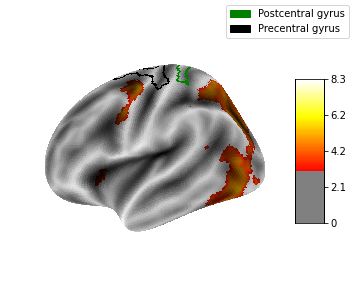

In [83]:
texture = surface.vol_to_surf(st, fsaverage.pial_left)

cmap = mpl.cm.plasma # pink - yellow

fig = plotting.plot_surf_stat_map(
    fsaverage.infl_left, texture, hemi='left',
    #title='Surface left hemisphere, tranzition zone', 
    #colorbar=False,
    threshold=3.1, bg_map=fsaverage.sulc_left,view='lateral',
    vmax=8.3, bg_on_data=True)
    #st, bg_on_data = True,
    #                      views=['lateral', 'medial'],
    #                      hemispheres=['left', 'right'],
     #                     colorbar=True, cmap = cmap

plotting.plot_surf_contours(fsaverage.infl_right, parcellation, labels=labels,
                            levels=regions_indices, figure=fig,
                            legend=True,
                            colors=['g', 'k'])

fig.show()

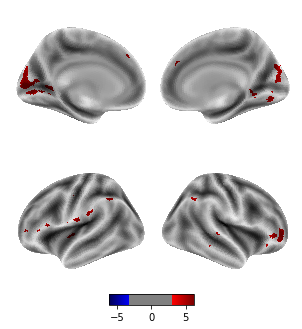

In [16]:
plotting.plot_img_on_surf(tranzition, bg_on_data = True, #mask_img = clusters,
                          views=['medial', 'lateral'],
                          hemispheres=['left', 'right'],
                          colorbar=True, 
                          cmap = 'seismic',
                          inflate=True,
                          threshold=3.1,
                          #cut_coords = 5,
                          #title = "occipital"
                         )


plotting.show()

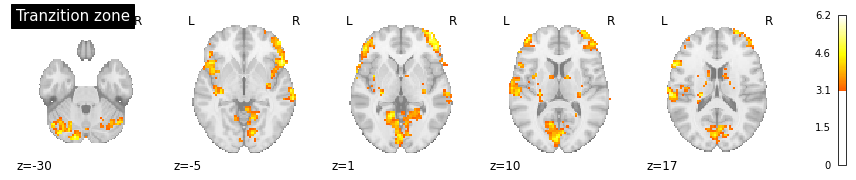

In [26]:
plotting.plot_stat_map(tranzition, threshold=3.1,
                       cut_coords=(-30,-5,1,10,17),
                       #cut_coords=5,
                       draw_cross=False,
                       display_mode="z",
                       #vmax=1,upperbond of the colormap
                       colorbar=True,
                       title="Tranzition zone",
                       )
plt.savefig(pth+"first_event.png", dpi=1000)

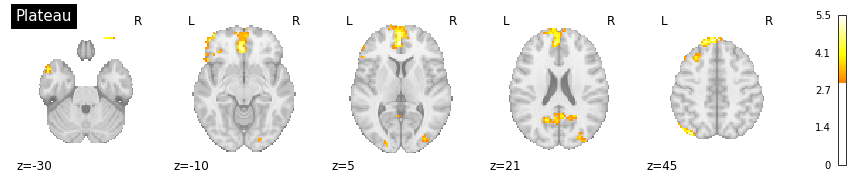

In [6]:
plotting.plot_stat_map(plateau, threshold=3.1,
                       #cut_coords=(0,0,0),
                       cut_coords=5,
                       draw_cross=False,
                       display_mode="z",
                       #vmax=1,upperbond of the colormap
                       colorbar=True,
                       title="Plateau",
                       )
plt.savefig(pth+"second_event.png", dpi=1000)

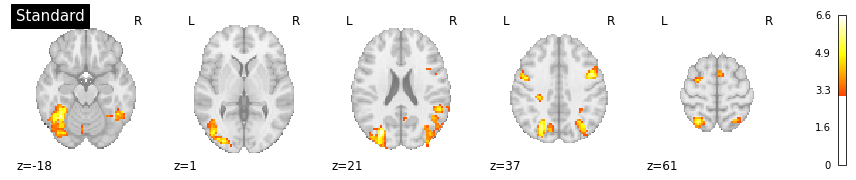

In [7]:
plotting.plot_stat_map(standard, threshold=3.1,
                       #cut_coords=(0,0,0),
                       cut_coords=5,
                       draw_cross=False,
                       display_mode="z",
                       #vmax=1,upperbond of the colormap
                       colorbar=True,
                       title="Standard",
                       )
plt.savefig(pth+"standard.png", dpi=1000)

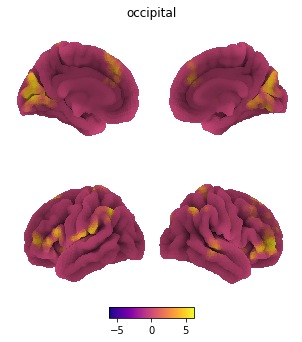

In [22]:
# cmap = mpl.cm.viridis greenish - yellow
# https://matplotlib.org/stable/gallery/color/colormap_reference.html

clusters = nib.load(pth+'/contrast1.gfeat/cope1.feat/cluster_mask_zstat1.nii.gz')

cmap = mpl.cm.plasma # pink - yellow
plotting.plot_img_on_surf(tranzition, bg_on_data = True, #mask_img = clusters,
                          views=['medial', 'lateral'],
                          hemispheres=['left', 'right'],
                          colorbar=True, cmap = cmap,
                          #cut_coords = 5,
                          title = "occipital")


plotting.show()

In [116]:
# sub = nib.load('/media/lisz/HD710 PRO/time_fmri/data/derivatives/preprocess/sub-01/func/sub-01_task-reproduction_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
# aff = sub.affine
# sub_data = sub.get_fdata()
# clusters = nib.load(pth+'/contrast1.gfeat/cope1.feat/cluster_mask_zstat1.nii.gz').get_fdata()
# new_image = np.zeros(sub_data.shape)

# # Loop through the fourth dimension (volume) of subject data
# for i in range(sub_data.shape[3]):
#     # Get the current volume
#     volume = sub_data[:, :, :, i]
    
#     # Apply cluster masks to the current volume
#     #masked_volume = np.where(np.isin(clusters, desired_clusters), volume, 0)
#     masked_volume = np.where(np.isin(clusters, (np.unique(clusters)+1).tolist()), volume, 0)
    
#     # Assign the temporary new image slice to the corresponding slice in the new image
#     new_image[:, :, :, i] = masked_volume
    
# # Convert the new data array to a Nifti image object
# sub_img = nib.Nifti1Image(new_image, aff)

# nib.save(sub_img,'/media/lisz/HD710 PRO/time_fmri/data/derivatives/sub1_time-series.nii.gz')

In [137]:
def extract_time_series(sub_id, run, contrast_n):
    """
    Extract time series for all clusters
    :param sub: pass a subject number
    :param run: define run number
    :param contrast: specify contrast number
    :return save a nifti image with only thise values which are within clusters
    """
    sub = nib.load('/media/lisz/HD710 PRO/time_fmri/data/derivatives/preprocess/' \
                   f'{sub_id}/func/{sub_id}_task-reproduction_{run}_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
    aff = sub.affine
    sub_data = sub.get_fdata()
    clusters = nib.load(pth+f'/contrast{contrast_n}.gfeat/cope1.feat/cluster_mask_zstat1.nii.gz').get_fdata()
    new_image = np.zeros(sub_data.shape)

    # Loop through the fourth dimension (volume) of subject data
    for i in range(sub_data.shape[3]):
        # Get the current volume
        volume = sub_data[:, :, :, i]

        # Apply cluster masks to the current volume
        masked_volume = np.where(np.isin(clusters, (np.unique(clusters)+1).tolist()), volume, 0)

        # Assign the temporary new image slice to the corresponding slice in the new image
        new_image[:, :, :, i] = masked_volume

    # Convert the new data array to a Nifti image object
    sub_img = nib.Nifti1Image(new_image, aff)

    nib.save(sub_img,'/media/lisz/HD710 PRO/time_fmri/data/derivatives/glm_main_model/time-series/' \
             f'{sub_id}_{run}_contrast{contrast_n}_time-series.nii.gz')

In [138]:
import pandas as pd
import csv

# load list of subjects
pth_sub_list = "/home/lisz/Desktop/Time_project/time_fmri/data"
with open(pth_sub_list+'/participants.tsv', 'r') as tsv_file:
    subjects = ['sub-{0:02d}'.format(int(row['participant_id'])) for row in csv.DictReader(tsv_file, delimiter='\t')]

runs = ['run-01', 'run-02', 'run-03', 'run-04']

def run_time_series():
    # loop through all subjects
    for subject in subjects:
        # loop thought all runs
        for r in runs:
            # loop through all contrasts
            for contrast in range(1, 11):
                extract_time_series(subject, r, contrast)

# run all together
run_time_series()

In [140]:
time_series_data = []
subjects_list = ['sub-01','sub-02','sub-03','sub-04']
run_list = ['run-01', 'run-02', 'run-03', 'run-04']
ts_pth = '/media/lisz/HD710 PRO/time_fmri/data/derivatives/glm_main_model/time-series'

for subject in subjects_list:
    for run in run_list:
        nifti_file = ts_pth+f"/{subject}_{run}_contrast1_time-series.nii.gz"
        nifti_data = nib.load(nifti_file).get_fdata()
        time_series_data.append(nifti_data)

In [141]:
time_series_data

[array([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0.

In [143]:
time_series_data = np.array(time_series_data)

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: could not broadcast input array from shape (65,77,49,140) into shape (65,77,49)

In [4]:
from nilearn import datasets
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


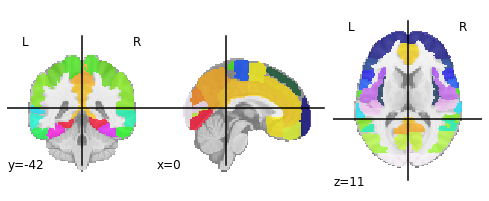

In [5]:
from nilearn import plotting
plotting.plot_roi(atlas_filename)

In [16]:
#from nilearn.maskers import NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
ts = masker.fit_transform(st)
print(ts)

[[0.         0.18100889 0.33758426 0.49040148 0.04605899 0.38385582
  0.8348126  0.         0.         0.03546449 0.         0.
  0.06945699 0.         0.         0.84594786 0.01835423 1.2298384
  0.16643202 0.9253335  0.48772588 1.5799437  1.604329   0.
  0.         1.4716115  0.         0.16724794 0.02783623 0.
  0.40009663 0.         0.02853374 0.         0.         0.01871388
  0.         0.11359286 0.9332853  0.65596026 0.82806253 0.
  0.         0.         0.         0.01884658 0.         0.27998182]]


/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/nilearn/signal.py:68: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [19]:
ts = roi.get_fmriprep_timeseries(fmriprep_folder='/home/lisz/Desktop/Time_project/time_fmri/data/derivatives/fmriprep/',
                                 sourcedata_folder='/home/lisz/Desktop/Time_project/time_fmri/data',
                                 atlas=atlas_pauli)

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/bids/layout/layout.py:791: UserWarning: In pybids 0.9.0, the 'extensions' filter was deprecated in favor of 'extension'. The former will stop working in 0.11.0.
  warnings.warn("In pybids 0.9.0, the 'extensions' filter was "


ValueError: No objects to concatenate

In [156]:
from nideconv.utils import roi
from nilearn import datasets
from os.path import join as opj
from nilearn import plotting

atlas_pauli = datasets.fetch_atlas_pauli_2017()

prep_data = '/home/lisz/Desktop/Time_project/time_fmri/data/'

confounds_fn = prep_data+'/derivatives/preprocess/confounds'

mask_file = nib.load(pth+'/contrast1.gfeat/cope1.feat/cluster_mask_zstat1.nii.gz')

%matplotlib inline

#nilearn.plotting.plot_roi(mask_file)

masker = nilearn.input_data.NiftiMasker(mask_img=mask_file,
                                        standardize=False,
                                        detrend=False, verbose=5)


masker.fit_transform(st)

#ts = roi.get_fmriprep_timeseries(fmriprep_folder=opj(prep_data, 'derivatives', 'fmriprep'),
#                                 sourcedata_folder=prep_data,
#                                 atlas=a)
#print(ts)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(65, 77, 49, 1),
affine=array([[   3. ,    0. ,    0. ,  -96.5],
       [   0. ,    3. ,    0. , -132.5],
       [   0. ,    0. ,    4. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals


ValueError: Given mask is not made of 2 values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]. Cannot interpret as true or false

In [17]:
atlas = nib.load('/home/lisz/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz')

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/numpy/ma/core.py:2832: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: No contour levels were found within the data range.
  **kwargs)
/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: linewidths is ignored by contourf
  **kwargs)


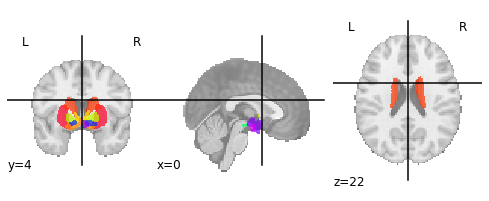

In [9]:
plotting.plot_prob_atlas(atlas)